In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import numpy as np

In [2]:
def f(x):
    return x**3 -2*x + 2

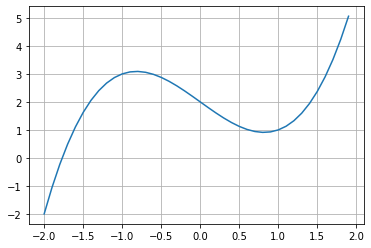

In [3]:
x = np.arange(-2, 2, 0.1)

plt.plot(x, f(x))
plt.grid()
plt.show()

In [4]:
def f_derived(x):
    return 3*x**2 - 2

In [5]:
x_1 = -np.sqrt(2/3)
x_2 = np.sqrt(2/3)

$x_1 = -\sqrt{\frac{2}{3}}$


$x_2 = \sqrt{\frac{2}{3}}$

In [6]:
def f_derived_2(x):
    return 6*x

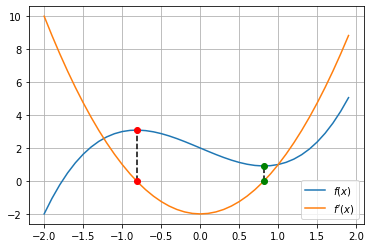

In [7]:
plt.clf()

plt.plot(x, f(x), label=r'$f(x)$')
plt.plot(x, f_derived(x), label=r"$f'(x)$")

plt.vlines(x_1, ymin=0, ymax=f(x_1), colors=['k'], linestyle=['dashed'])
plt.vlines(x_2, ymin=0, ymax=f(x_2), colors=['k'], linestyle=['dashed'])

plt.plot(x_1, f(x_1), 'ro')
plt.plot(x_1, f_derived(x_1), 'ro')

plt.plot(x_2, f(x_2), 'go')
plt.plot(x_2, f_derived(x_2), 'go')

plt.grid()
plt.legend()
plt.show()

$f''(x) = 6x$

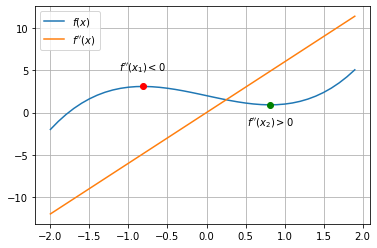

In [8]:
plt.clf()

plt.plot(x, f(x), label=r'$f(x)$')
plt.plot(x, f_derived_2(x), label=r"$f''(x)$")

plt.text(x=x_1, y=5, s=r"$f''(x_1) < 0$", ha='center')
plt.text(x=x_2, y=-1.5, s=r"$f''(x_2) > 0$", ha='center')

plt.plot(x_1, f(x_1), 'ro')
plt.plot(x_2, f(x_2), 'go')

plt.legend()
plt.grid()
plt.show()

In [13]:
def f(x):
    return x[0]**2 + x[1]**2